# 1. Import all relevant packages
In the first cell of the notebook, import all the necessary packages such as pandas, numpy, matplotlib, seaborn, scikit-learn, and any other package that you may need for data preprocessing and model fitting.


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

# for the yeo-johnson transformation
import scipy.stats as stats


%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 2. Read the dataset, giving it a suitable name
In the next cell, read the dataset using pandas read_csv() method and assign it to a variable with a suitable name.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/BADM 576/Extra Credit/HR Prediction/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv(path+"HR_prediction.csv")

# 3. Explore the data
Using pandas and matplotlib/seaborn, explore the data for variables related to the target variable "promoted". Show visualizations such as boxplots, histograms, bar charts and scatter plots on your choice of variables. Justify the choice of charts for the chosen variables and interpret the chart output.

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_>80%,awards_won?,avg_training_score,promoted
0,A_1,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,A_2,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,A_3,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,A_4,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,A_5,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0


## 2.1 Histograms
We will show the distribution of target variable and all continuous variables.

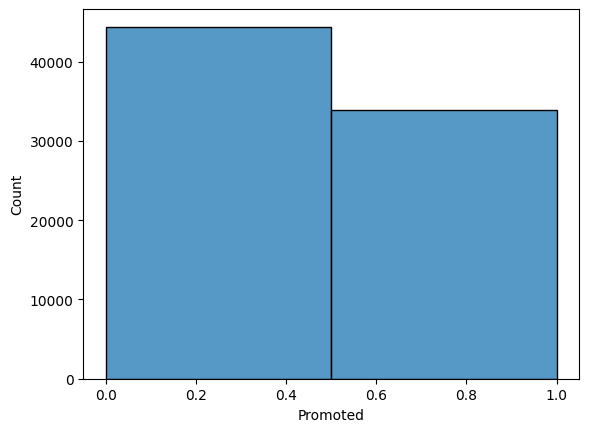

In [ ]:
# distribution of the target variable "promoted" using a histogram
sns.histplot(df['promoted'], bins=2)
plt.xlabel('Promoted')
plt.ylabel('Count')
plt.show()

The target variable has similar number of 0 and 1, meaning the dataset is balanced.

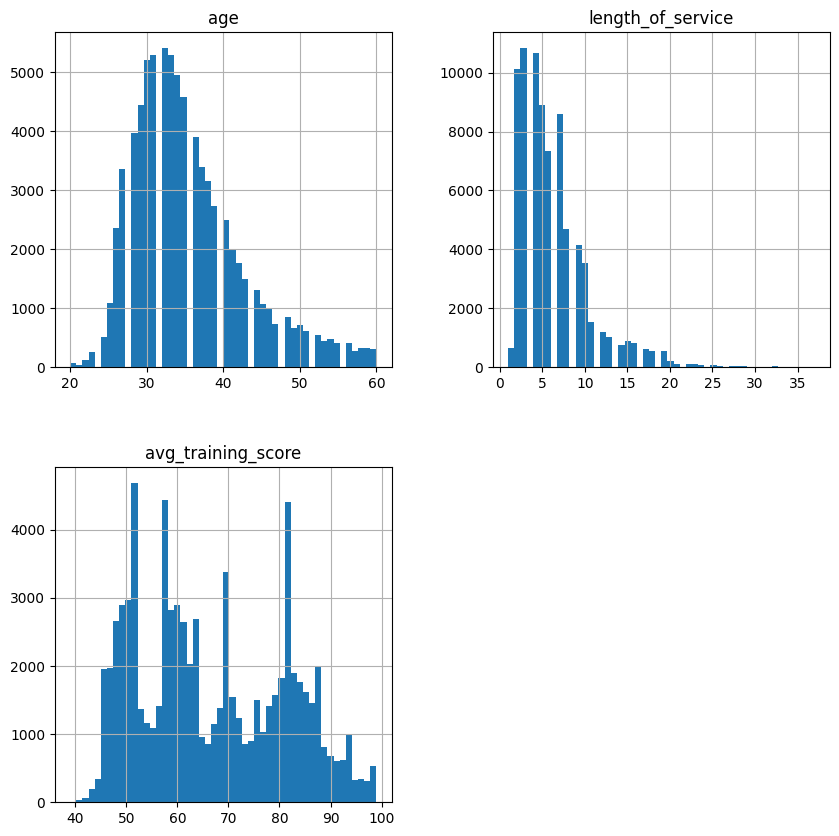

In [ ]:
# Visualize distribution of all continuous variables
cont_vars = ['age', 'length_of_service',  'avg_training_score']
df[cont_vars].hist(bins=50, figsize=(10,10))
plt.show()

Based on the histograms of three continuous variables, it appears that length_of_service is skewed to the right, age is slightly skewed to the right, and avg_training_score does not follow a normal distribution.

## 2.1 Bar Chart
We will use bar charts to show the relationships of categorical variables and "promoted".

In [ ]:
cat_vars = ['department', 'region', 'education', 'gender','no_of_trainings', 'recruitment_channel','KPIs_met_>80%', 'awards_won?']
df[cat_vars].nunique()

department              9
region                 34
education               3
gender                  2
no_of_trainings        10
recruitment_channel     3
KPIs_met_>80%           2
awards_won?             2
dtype: int64

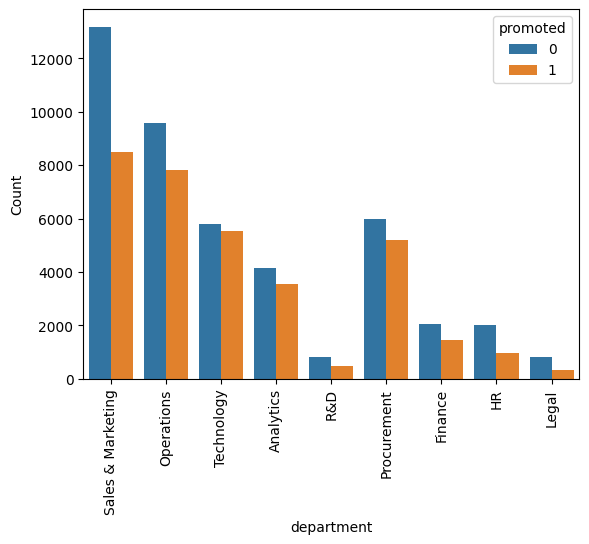

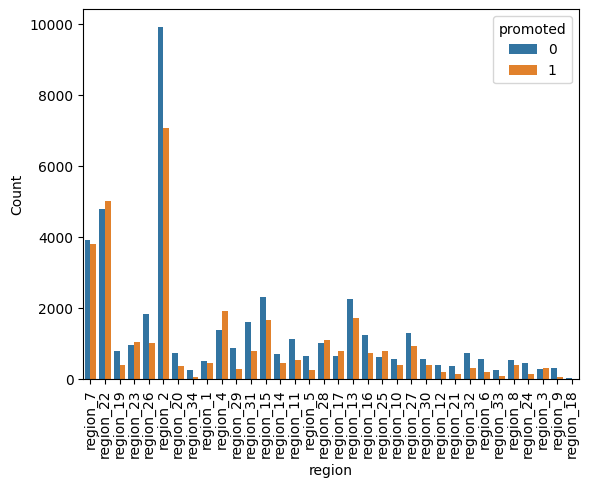

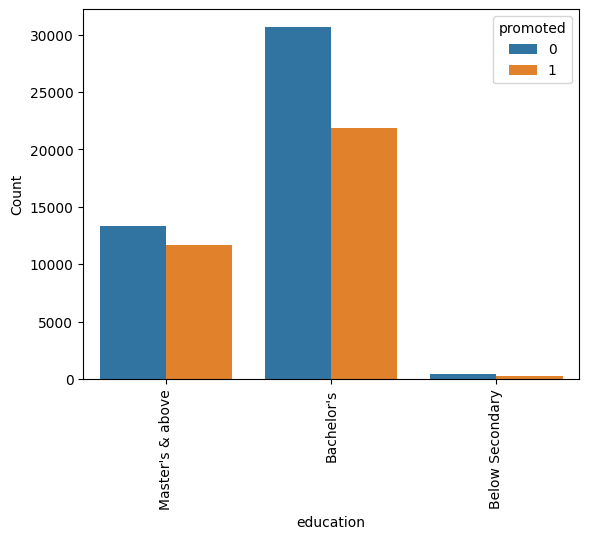

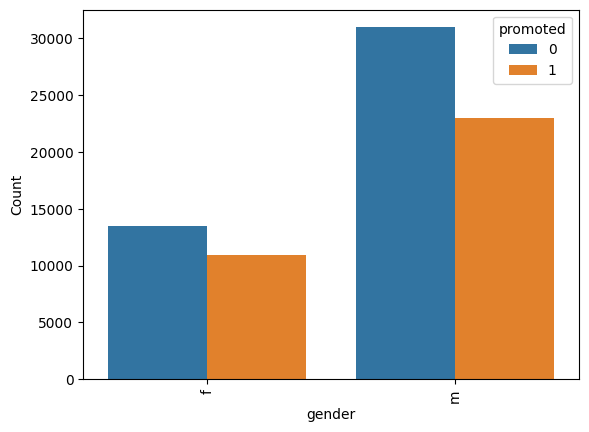

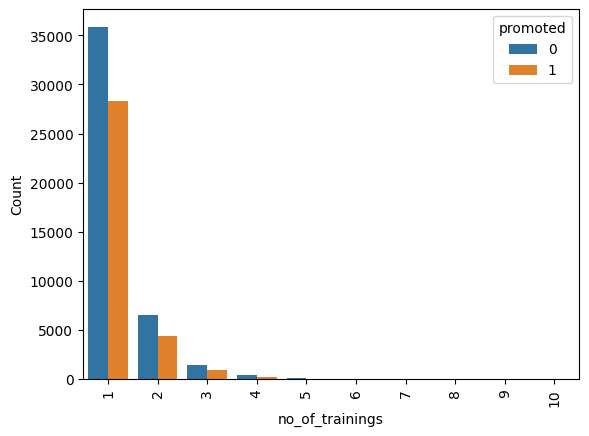

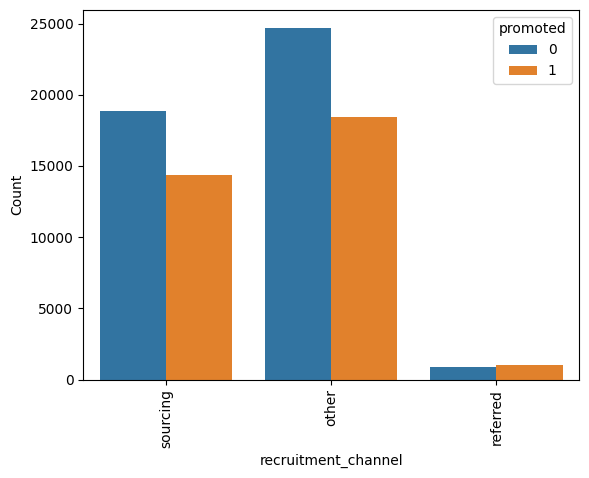

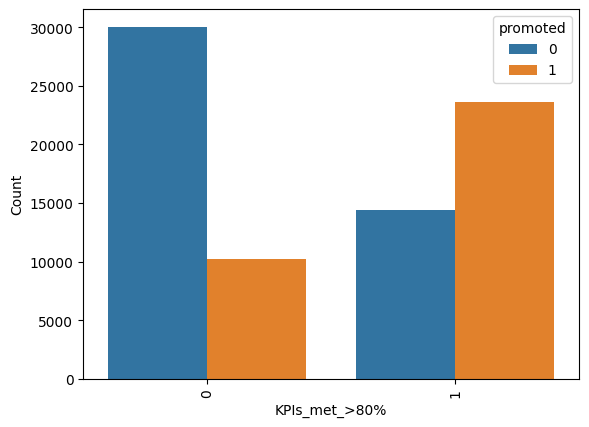

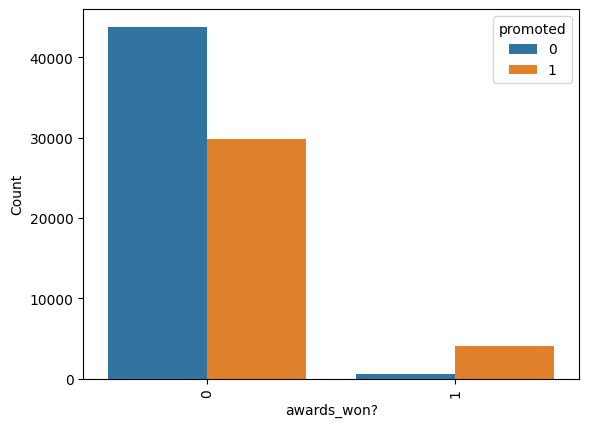

In [ ]:
# Categorical variables and "promoted" -  bar chart
for var in cat_vars:
  sns.countplot(x= var, hue='promoted', data=df)
  plt.xticks(rotation=90)
  plt.xlabel(var)
  plt.ylabel('Count')
  plt.show()

The bar charts show that there is a higher number of promoted individuals who met the KPIs_met>80% or won awards, compared to those who did not. This suggests that meeting KPIs or winning awards could be associated with higher chances of being promoted.

## 2.3 Box Plots
We then create box plots for numerical variables.

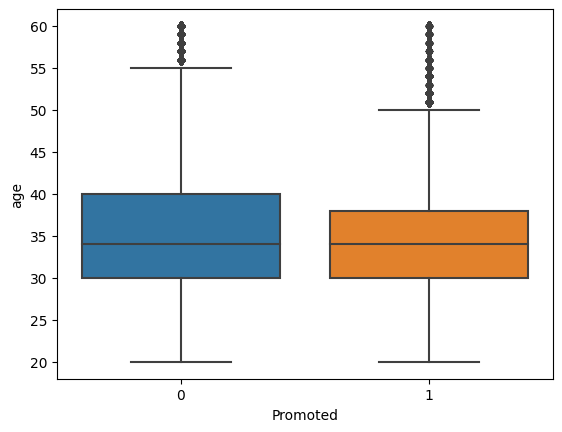

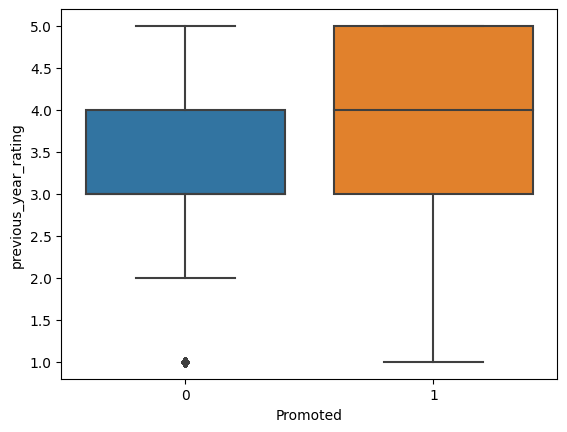

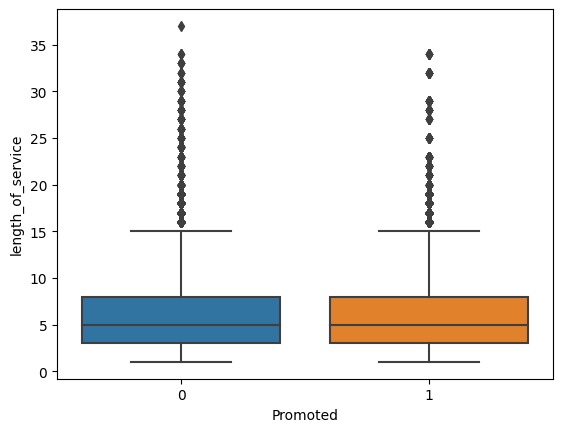

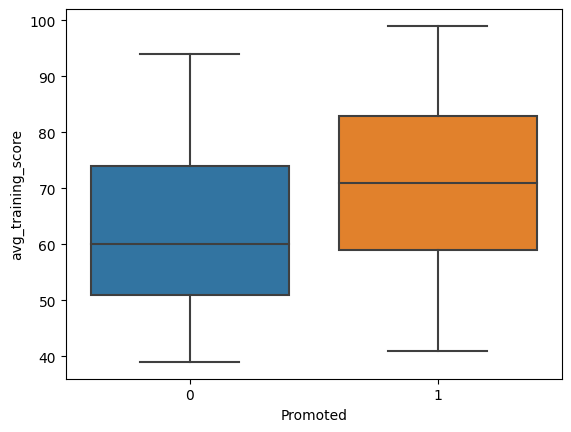

In [ ]:
# num_vars and "promoted" -  box plot
num_vars = ['age', 'previous_year_rating','length_of_service', 'avg_training_score']
for var in num_vars:
  sns.boxplot(x='promoted', y=var, data=df)
  plt.xlabel('Promoted')
  plt.ylabel(var)
  plt.show()

From the box plots, we can notice that the avgerage training score is higher among the promoted individuals.

# 3. Data preprocessing
Explore the dataset for the number of rows and columns, missing values, duplicates, and other data quality issues such categorical columns, skewed distributions.

## 3.1 data shape

In [ ]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_>80%', 'awards_won?',
       'avg_training_score', 'promoted'],
      dtype='object')

In [ ]:
# Drop id column
df = df.drop('employee_id', axis=1)

In [ ]:
# number of rows and columns
df.shape

(78284, 13)

## 3.2 missing values, duplicates

In [ ]:
# missing values
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
# check the proportion of missingness using "mean" on isnull()
df[vars_with_na].isnull().mean()

Series([], dtype: float64)

There is no NAs.

In [ ]:
# duplicates
df.duplicated().sum()

29677

There is no duplicates.

## 3.3 Pipeline and Column Transformer
Use scikit-learn's Pipeline and Column Transformer to preprocess the data.

# 4. Model building & Grid search
Fit an error-based (Linear or Logistic Regression), Tree-based, and a KNN model to predict whether an employee will be promoted. Use scikit-learn to fit the models and evaluate their performance using accuracy, precision, recall, f1-score, and any other metric that you deem appropriate. Perform hyperparameter tuning using GridSearchCV to find the best hyperparameters for each model.


## 4.1 train-test split

In [ ]:
X = df.drop(columns = ["promoted"])
y = df["promoted"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((62627, 12), (62627,))

In [ ]:
cat_vars, num_vars

(['department',
  'region',
  'education',
  'gender',
  'no_of_trainings',
  'recruitment_channel',
  'KPIs_met_>80%',
  'awards_won?'],
 ['age', 'previous_year_rating', 'length_of_service', 'avg_training_score'])

In [ ]:
# Define the preprocessor for the categorical column
cat_preprocessor = OneHotEncoder()
# Define the preprocessor for the numerical columns
num_preprocessor = StandardScaler()
# Combine the preprocessors using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num_preprocessor', num_preprocessor, num_vars),
    ('cat_preprocessor', cat_preprocessor,cat_vars)
])

## 4.2 error-based (Logistic Regression)

In [ ]:
log_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf',LogisticRegression())
])
# Define the parameter grid to search over
param_grid = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.1, 1.0],
    'clf__solver': ['liblinear', 'saga']
}

# Create the grid search object
grid_search = GridSearchCV(log_pipeline, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

Best hyperparameters found:
{'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}


In [ ]:
# Refit the model with the best hyperparameters on the entire training dataset
best_log_pipeline = grid_search.best_estimator_
best_log_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  StandardScaler(),
                                                  ['age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('cat_preprocessor',
                                                  OneHotEncoder(),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'no_of_trainings',
                                                   'recruitment_channel',
                                                   'KPIs_met_>80%',
                                                   'awards_won?'])])),
                ('clf',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [ ]:
# Fit the model
train_pred_log = best_log_pipeline.predict(X_train)
test_pred_log = best_log_pipeline.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, train_pred_log)
print(confusion_matrix(y_train, train_pred_log))
print(f"Model Accuracy on the Train Data is {train_accuracy}")

print("*******" * 4)


test_accuracy = accuracy_score(y_test, test_pred_log)
print(confusion_matrix(y_test, test_pred_log))
print(f"Model Accuracy on the Test Data is {test_accuracy}")

[[28540  7006]
 [ 6715 20366]]
Model Accuracy on the Train Data is 0.7809091925207977
****************************
[[7160 1722]
 [1677 5098]]
Model Accuracy on the Test Data is 0.782908603180686


In [ ]:
# Evaluate the model
print(classification_report(y_test, test_pred_log, zero_division=1))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      8882
           1       0.75      0.75      0.75      6775

    accuracy                           0.78     15657
   macro avg       0.78      0.78      0.78     15657
weighted avg       0.78      0.78      0.78     15657



## 4.3 Tree-based(random forest)

In [ ]:
# Create the pipeline
rf_pipeline = Pipeline(steps = [
    ("pre", preprocessor),  
    ("rf", RandomForestClassifier(random_state=42))
])
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10],
    'rf__min_samples_split': [2, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num_preprocessor',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'avg_training_score']),
                                                                        ('cat_preprocessor',
                                                                         OneHotEncoder(),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'no_of_trainings',
                                                                          'recruitment_channel',
                                                                          'KPIs_met_>80%',
                                                                          'awards_won?'])])),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [100, 200]},
             verbose=2)

In [ ]:
# Print the best parameters and score
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best score found:
nan


In [ ]:
# Refit the model with the best hyperparameters on the entire training dataset
best_rf_pipeline = grid_search.best_estimator_
best_rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  StandardScaler(),
                                                  ['age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('cat_preprocessor',
                                                  OneHotEncoder(),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'no_of_trainings',
                                                   'recruitment_channel',
                                                   'KPIs_met_>80%',
                                                   'awards_won?'])])),
                ('rf', RandomForestClassifier(random_state=42))])

In [ ]:
# Fit the model
train_pred_rf = best_rf_pipeline.predict(X_train)
test_pred_rf = best_rf_pipeline.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, train_pred_rf)
print(confusion_matrix(y_train, train_pred_rf))
print(f"Model Accuracy on the Train Data is {train_accuracy}")

print("*******" * 4)


test_accuracy = accuracy_score(y_test, test_pred_rf)
print(confusion_matrix(y_test, test_pred_rf))
print(f"Model Accuracy on the Test Data is {test_accuracy}")

[[35541     5]
 [    0 27081]]
Model Accuracy on the Train Data is 0.999920162230348
****************************
[[8616  266]
 [   0 6775]]
Model Accuracy on the Test Data is 0.9830107938941048


In [ ]:
# Evaluate the model
print(classification_report(y_test, test_pred_rf, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8882
           1       0.96      1.00      0.98      6775

    accuracy                           0.98     15657
   macro avg       0.98      0.99      0.98     15657
weighted avg       0.98      0.98      0.98     15657



## 4.4 KNN

In [ ]:
# Create a KNN pipeline with standard scaler
knn_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Define the hyperparameter grid for grid search
param_grid = {
    'knn__n_neighbors': [5,7],
    'knn__weights': ['uniform', 'distance']
}

# Perform grid search using 5-fold cross validation
grid_search = GridSearchCV(knn_pipe, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/compose/_column_transformer.py", line 800, in transform
    Xs = self._fit_transform(
  File "/usr/local/lib/python3.9/dist-packages/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_preprocessor',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'avg_training_score']),
                                                                        ('cat_preprocessor',
                                                                         OneHotEncoder(),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'no_of_trainings',
                                                                          'recruitment_channel',
                                                                          'KPIs_met_>80%',
                                                                          'awards_won?'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [5, 7],
                         'knn__weights': ['uniform', 'distance']})

In [ ]:
# Print the best parameters and the corresponding accuracy score
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'knn__n_neighbors': 5, 'knn__weights': 'uniform'}


In [ ]:
# Refit the model with the best hyperparameters on the entire training dataset
best_knn_pipeline = grid_search.best_estimator_
best_knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  StandardScaler(),
                                                  ['age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'avg_training_score']),
                                                 ('cat_preprocessor',
                                                  OneHotEncoder(),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'no_of_trainings',
                                                   'recruitment_channel',
                                                   'KPIs_met_>80%',
                                                   'awards_won?'])])),
                ('knn', KNeighborsClassifier())])

In [ ]:
# Fit the model
train_pred_knn = best_knn_pipeline.predict(X_train)
test_pred_knn = best_knn_pipeline.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, train_pred_knn)
print(confusion_matrix(y_train, train_pred_knn))
print(f"Model Accuracy on the Train Data is {train_accuracy}")

print("*******" * 4)


test_accuracy = accuracy_score(y_test, test_pred_knn)
print(confusion_matrix(y_test, test_pred_knn))
print(f"Model Accuracy on the Test Data is {test_accuracy}")

[[31208  4338]
 [    3 27078]]
Model Accuracy on the Train Data is 0.9306848483880754
****************************
[[7381 1501]
 [  13 6762]]
Model Accuracy on the Test Data is 0.9033020374273488


In [ ]:
# Evaluate the model
print(classification_report(y_test, test_pred_knn, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      8882
           1       0.82      1.00      0.90      6775

    accuracy                           0.90     15657
   macro avg       0.91      0.91      0.90     15657
weighted avg       0.92      0.90      0.90     15657



# 5. Best model on test data
Finally, report the performance of the best model on the test data and draw conclusions about the models' performance and which one is the best for predicting employee promotions.

According to the results of three models, we have:


*   Logistic: precision 0.75; recall 0.75; f1-score 0.75; accuracy 0.78.
*   Ramdom Forest: precision 0.96; recall 1.00; f1-score 0.98; accuracy 0.98.
*   KNN: precision 0.82; recall 1.00; f1-score 0.90; accuracy 0.90.

Therefore, we can conclude that the **random forest** model performs the best with the highest presicion and recall at the same time.

In [ ]:
train_accuracy = accuracy_score(y_train, train_pred_rf)
print(confusion_matrix(y_train, train_pred_rf))
print(f"Model Accuracy on the Train Data is {train_accuracy}")

print("*******" * 4)


test_accuracy = accuracy_score(y_test, test_pred_rf)
print(confusion_matrix(y_test, test_pred_rf))
print(f"Model Accuracy on the Test Data is {test_accuracy}")

[[35541     5]
 [    0 27081]]
Model Accuracy on the Train Data is 0.999920162230348
****************************
[[8616  266]
 [   0 6775]]
Model Accuracy on the Test Data is 0.9830107938941048


In [ ]:
# Evaluate the model
print(classification_report(y_test, test_pred_rf, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8882
           1       0.96      1.00      0.98      6775

    accuracy                           0.98     15657
   macro avg       0.98      0.99      0.98     15657
weighted avg       0.98      0.98      0.98     15657



Here we present the performance of the random forest model. Notably, the accuracy between the training and test sets is similar, indicating that the model is not overfitting. As a result, we will choose random forest model for its best performance on presicion and recall.